In [1]:
# Import required libraries
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define function for cleaning Game column
def clean_game_column(df):
    new = df['0'].str.split(" ", n = 5, expand = True)
    df['Game Date'] = new[1]
    df['Win Loss'] = new[4]
    new_date = df['Game Date'].str.split('/', n = 1, expand = True)
    df['Month'] = new_date[0]
    df['Date'] = new_date[1]
    new_month = df['Month'].str[3]
    
    df['Month'] = new_month

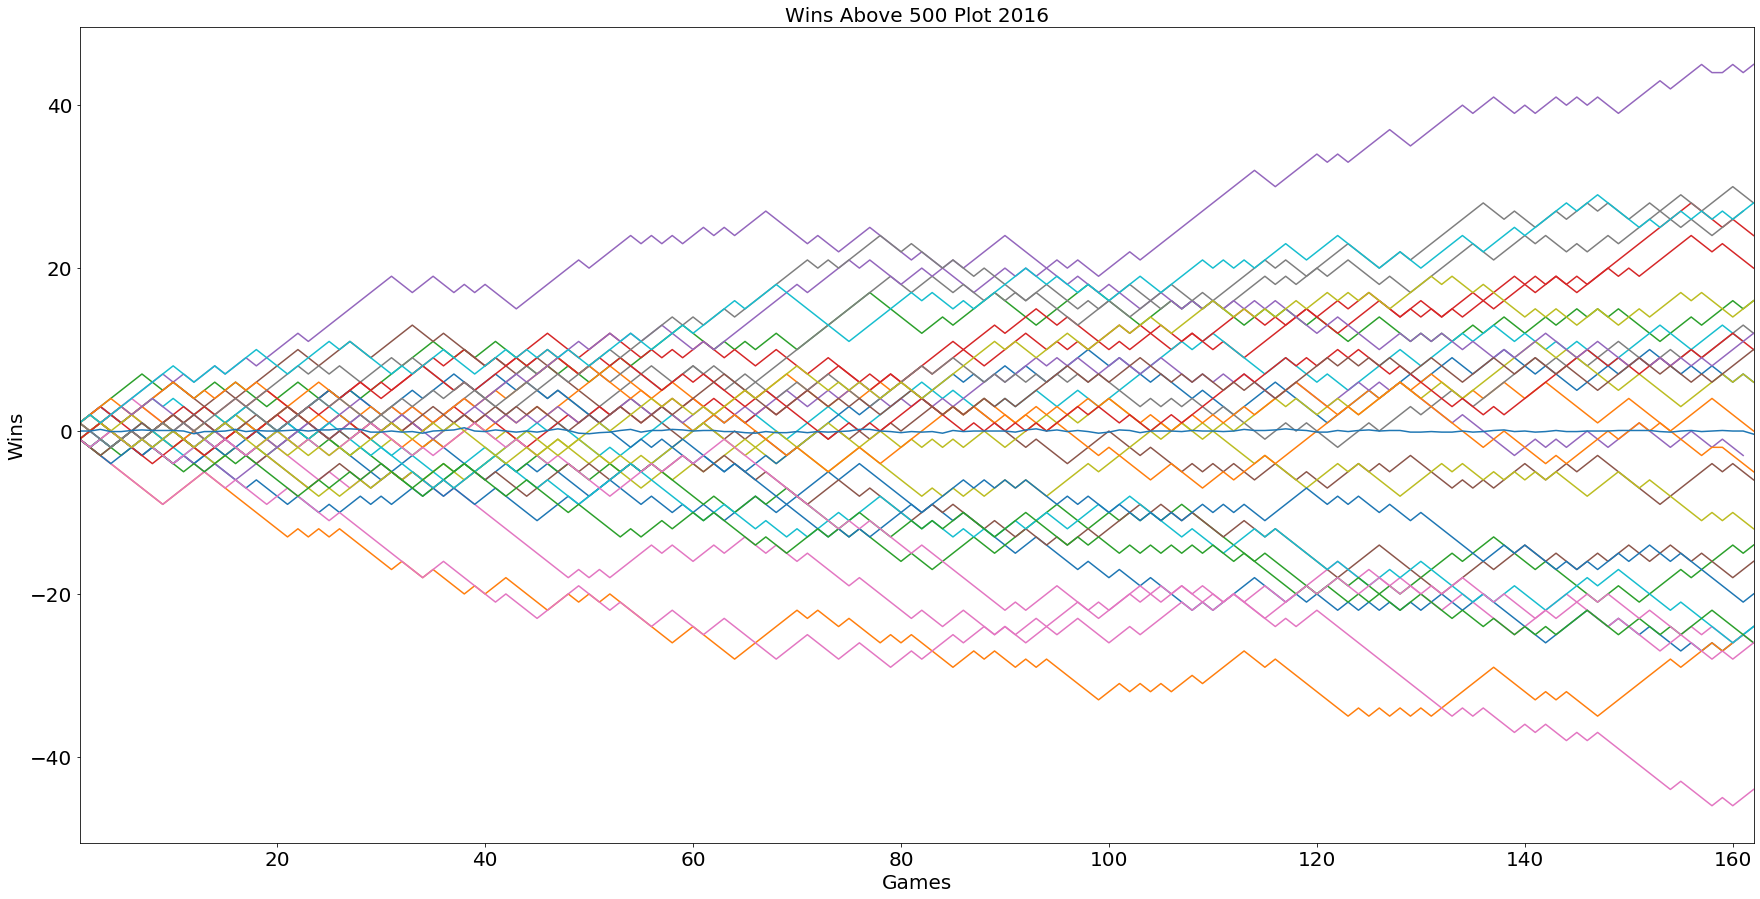

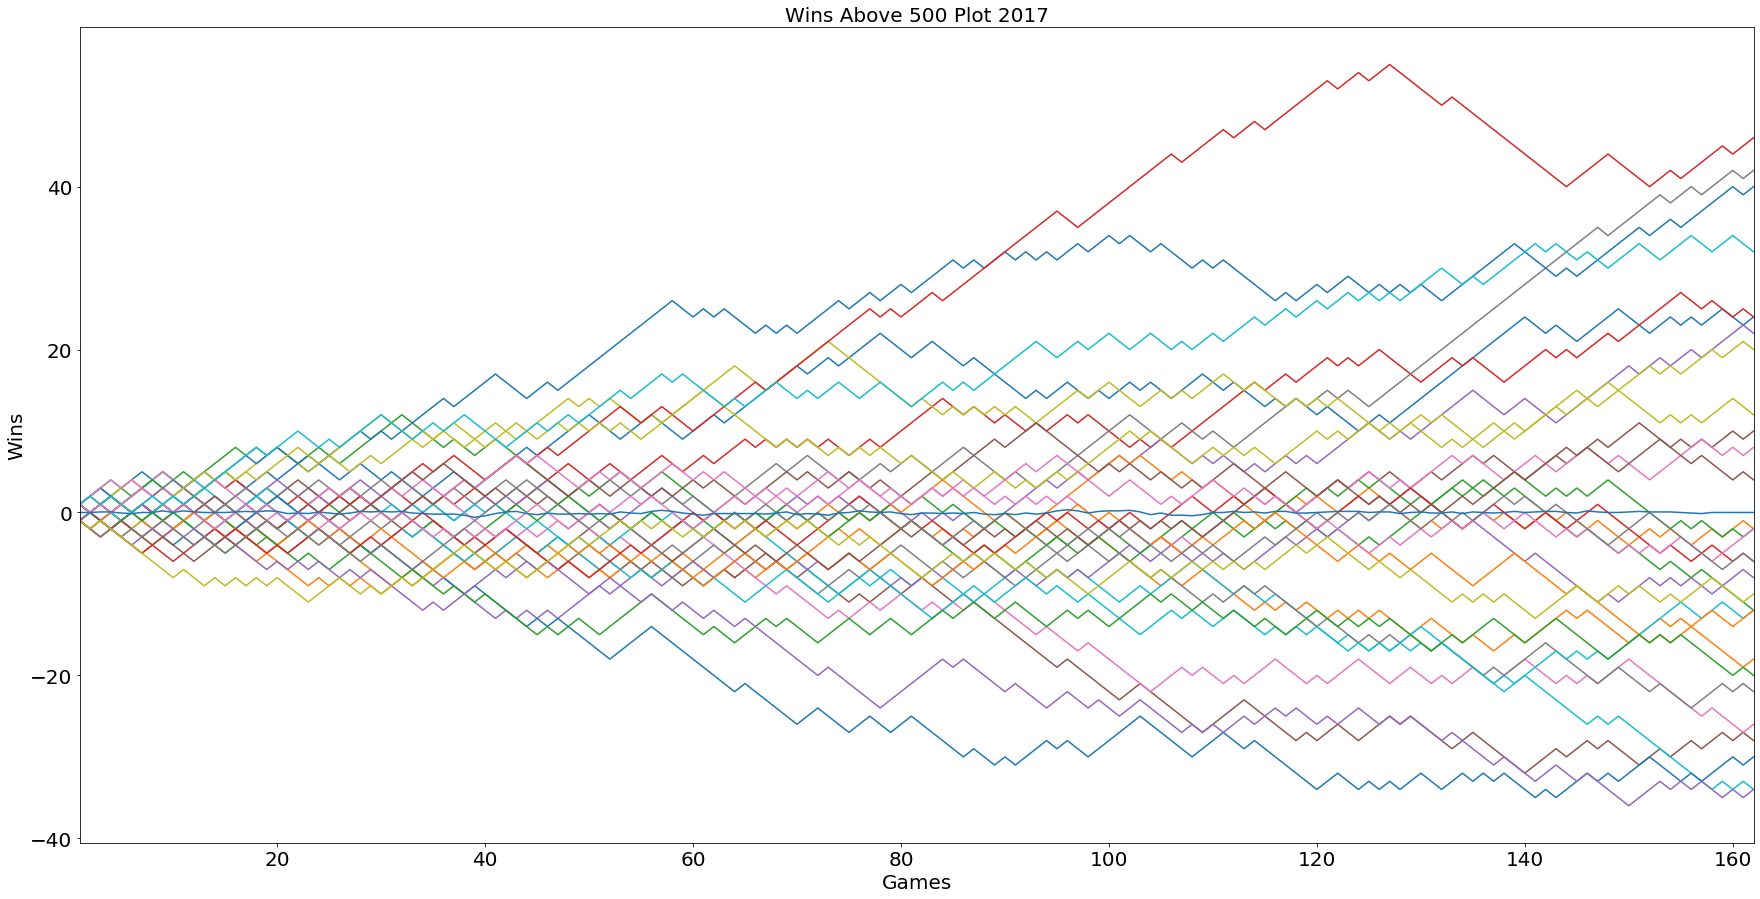

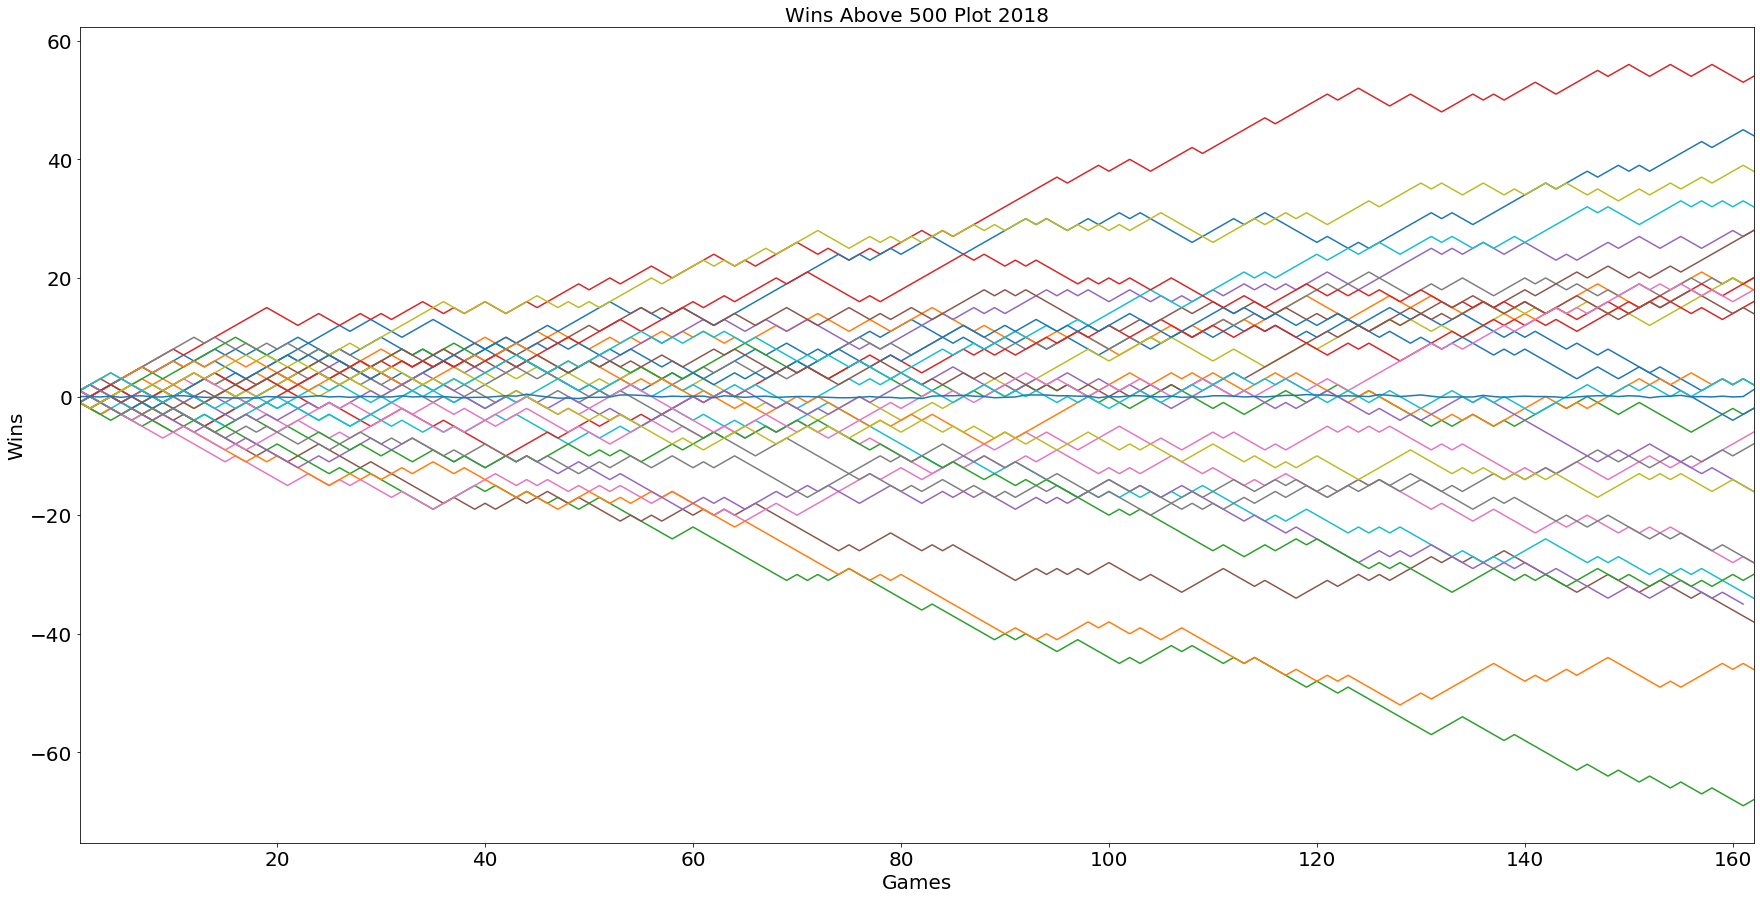

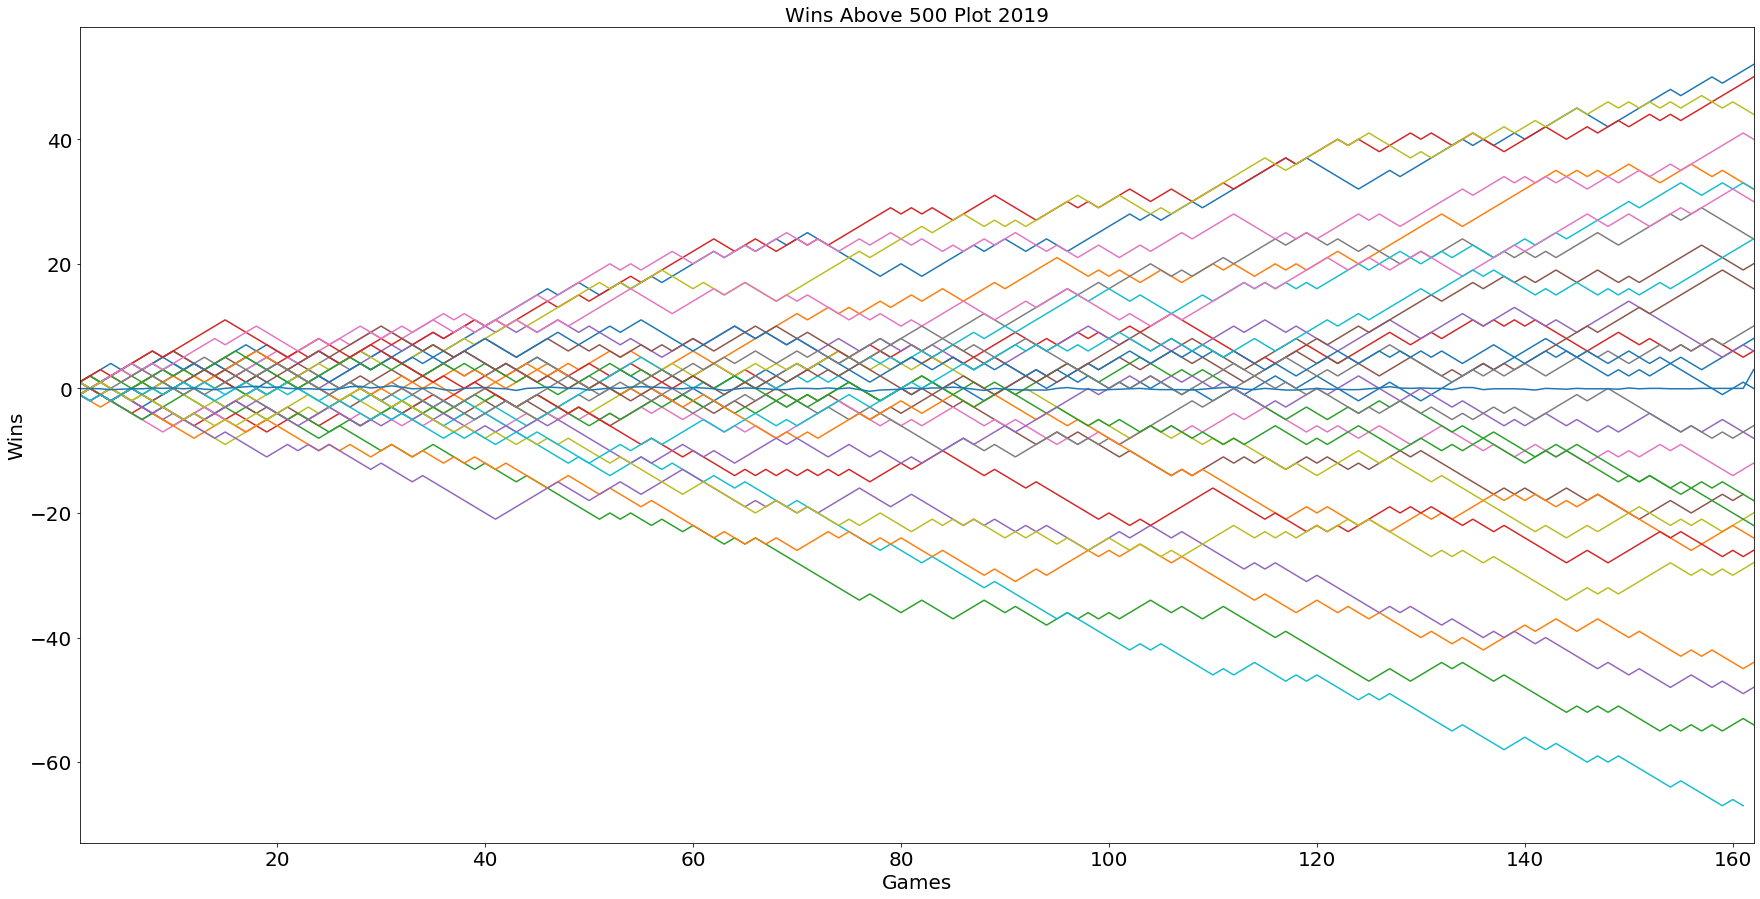

In [3]:
years = ['2016','2017','2018','2019']
team_names_abbr = ["ARI","ATL","BAL","BOS","CHC","CHW","CIN","CLE","COL","DET","HOU","KCR","LAA","LAD","MIA","MIL","MIN","NYM","NYY","OAK","PHI","PIT","SDP","SEA","SFG","STL","TBR","TEX","TOR","WSN"]
win_loss_dict = {
    'W':1,
    'L':-1,
    'T':0,
}
for year in years:
    win_loss_list = []

    for team in team_names_abbr:
        csv_name = '../Project_2/Lineups/' + team + '_Lineups_' + year + '.csv'
        csv_path = Path(csv_name)
        df = pd.read_csv(csv_name)
        clean_game_column(df)
        try:
            df['Win Loss'] = df["Win Loss"].apply(lambda x: win_loss_dict[x])
            
        except:
            df = df[:-1]
            df['Win Loss'] = df["Win Loss"].apply(lambda x: win_loss_dict[x])
        column_name = team
        df[column_name] = df['Win Loss']
        df[column_name].replace([np.NaN], 0, inplace = True)
        df[column_name] = df[column_name].cumsum()
        
        win_loss_500 = df[column_name]
        win_loss_list.append(win_loss_500)
    win_loss_list_lists = (win_loss_list)
    win_loss_df = pd.DataFrame(win_loss_list_lists)
    win_loss_df.columns = range(1,163)
    win_loss_df = win_loss_df.transpose()
    win_loss_df['Average'] = win_loss_df.mean(axis = 1)
    plot_name = 'Wins Above 500 Plot ' + year
    plot = win_loss_df.plot(kind = 'Line', figsize = (30,15), legend = None)
    plt.title(plot_name, fontsize=20)
    plt.xlabel('Games', fontsize=20)
    plt.ylabel('Wins', fontsize=20)
    plt.tick_params(axis="y", labelsize=20)
    plt.tick_params(axis="x", labelsize=20)
    plt.savefig(plot_name)